In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
# dcahce 데이터 가져오기
dl = open('doutput.txt','r')
data = dl.read().splitlines()

In [3]:
# 파일 명으로 데이터 구분하기
title = title = [s for s in data if 'File: ' in s]
title_index = [i for i in range(len(data)) if 'File: ' in data[i]]

In [6]:
# 결과가 존재하는 파일의 index만 추출
success_data_index = []
for i in range(len(title_index)-1):
    gap = title_index[i] - title_index[i+1]
    if gap == -74:
        j = title_index[i]
        success_data_index.append(j)

# 위의 코드로는 제일 마지막 파일이 포함되지 않아서 추가적으로 확인
if (title_index[-1] - len(data)) == -74:
    success_data_index.append(title_index[-1])

In [16]:
# 앞서 찾은 인덱스 목록으로 데이터 가져오기
sim_title = []
sim_data = []
for i in success_data_index:
    sim_title.append(data[i][11:(len(data[i])-4)].split('_'))
    sim_data.append(data[i+3:i+71])

In [22]:
# 제목의 정보와 통계값의 정보를 각각의 데이터 프레임으로 만듦 (데이터 추출을 편하게 하기 위함)_icache
cache_title_df = pd.DataFrame(columns = ['dl1','dl1_nsets','dl1_bsize','dl1_assoc','dl1_repl','dl2','dl2_nsets','dl2_bsize','dl2_assoc','dl2_repl'],data = sim_title)
cache_simul_df = pd.DataFrame(columns = ['sim_num_insn','sim_num_refs','sim_elapsed_time','sim_inst_rate','il1.accesses','il1.hits',
  'il1.misses','il1.replacements','il1.writebacks','il1.invalidations','il1.miss_rate','il1.repl_rate',
  'il1.wb_rate','il1.inv_rate','dl1.accesses','dl1.hits','dl1.misses','dl1.replacements','dl1.writebacks',
  'dl1.invalidations','dl1.miss_rate','dl1.repl_rate','dl1.wb_rate','dl1.inv_rate','dl2.accesses','dl2.hits',
  'dl2.misses','dl2.replacements','dl2.writebacks','dl2.invalidations','dl2.miss_rate','dl2.repl_rate','dl2.wb_rate',
  'dl2.inv_rate','itlb.accesses','itlb.hits','itlb.misses','itlb.replacements','itlb.writebacks','itlb.invalidations',
  'itlb.miss_rate','itlb.repl_rate','itlb.wb_rate','itlb.inv_rate','dtlb.accesses','dtlb.hits','dtlb.misses',
  'dtlb.replacements','dtlb.writebacks','dtlb.invalidations','dtlb.miss_rate','dtlb.repl_rate','dtlb.wb_rate',
  'dtlb.inv_rate','ld_text_base','ld_text_size','ld_data_base','ld_data_size','ld_stack_base','ld_stack_size',
  'ld_prog_entry','ld_environ_base','ld_target_big_endian','mem.page_count','mem.page_mem','mem.ptab_misses','mem.ptab_accesses','mem.ptab_miss_rate'], data = sim_data)

In [23]:
## cache_simul_df에 있는 문자들을 제거하고 필요한 데이터만 저장함
Data = []
for i in range(len(cache_simul_df)):
    row = []
    for j in cache_simul_df.columns.tolist():
        row.append(cache_simul_df.iloc[i].loc[j][len(j):cache_simul_df.iloc[i].loc[j].find("#")-1])
    Data.append(row)

cache_data_df = pd.DataFrame(columns = cache_simul_df.columns.tolist(), data = Data)

In [24]:
# title 데이터 프레임과 data 데이터 프레임을 합쳐서 하나의 데이터 프레임으로 만듦
cache_df = pd.concat([cache_title_df,cache_data_df],axis = 1)

In [25]:
# 시뮬레이션에 성공은 했지만 오류가 발생한 데이터 제거
refine = []
for i in range(len(cache_df)):
    if int(cache_df['sim_num_insn'][i])!=0 :
        refine.append(i)
useful_data = cache_df.iloc[refine]

In [3]:
# 데이터 백업 및 타입 변경을 위한 csv파일 저장 및 읽기
#useful_data.to_csv('dcache_simul_useful_data.csv',index = False)
Data_df = pd.read_csv('dcache_simul_useful_data.csv')

In [4]:
Data_df.head()

,dl1,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,dl2,dl2_nsets,dl2_bsize,dl2_assoc,dl2_repl,...,ld_stack_base,ld_stack_size,ld_prog_entry,ld_environ_base,ld_target_big_endian,mem.page_count,mem.page_mem,mem.ptab_misses,mem.ptab_accesses,mem.ptab_miss_rate
0,dl1,4,256,4,l,dl2,1,4096,8,r,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,301,2408k,2431,7155370,0.0003
1,dl1,8,256,2,r,dl2,64,64,8,f,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,267,2136k,268,4347304,0.0001
2,dl1,2,256,8,r,dl2,16,512,4,r,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,301,2408k,2431,7155370,0.0003
3,dl1,128,8,4,f,dl2,2,2048,8,f,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,301,2408k,2431,7155370,0.0003
4,dl1,4,128,8,f,dl2,128,32,4,r,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,267,2136k,268,4347304,0.0001


In [5]:
# 분석을 진행할 항목만 추출
target_df = Data_df.iloc[:,[1,2,3,4,6,7,8,9,26,30,36,40]]

In [6]:
# 분석의 가정을 활용하기 위해 il2_size 계산해서 추가하기
dl2_size = pd.DataFrame(columns = ['dl2_size'],data = np.array(target_df.iloc[:,4])*np.array(target_df.iloc[:,5])*np.array(target_df.iloc[:,6]))
target_df1 = pd.concat([dl2_size,target_df],axis = 1)

In [7]:
target_df1

,dl2_size,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,dl2_nsets,dl2_bsize,dl2_assoc,dl2_repl,dl1.misses,dl1.miss_rate,dl2.misses,dl2.miss_rate
0,32768,4,256,4,l,1,4096,8,r,18075,0.0447,16494,0.2533
1,32768,8,256,2,r,64,64,8,f,1,1.0000,1,1.0000
2,32768,2,256,8,r,16,512,4,r,16385,0.0406,6408,0.1007
3,32768,128,8,4,f,2,2048,8,f,26888,0.0665,7993,0.0892
4,16384,4,128,8,f,128,32,4,r,1,1.0000,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27715,32768,32,32,4,f,512,64,1,l,11173,0.0277,17135,0.2869
27716,8192,2,512,4,f,8,1024,1,f,32374,0.0801,44242,0.5217
27717,8192,512,8,1,f,1,512,16,l,31004,0.0767,13785,0.1446
27718,16384,4,512,2,f,8,256,8,l,1,1.0000,1,1.0000


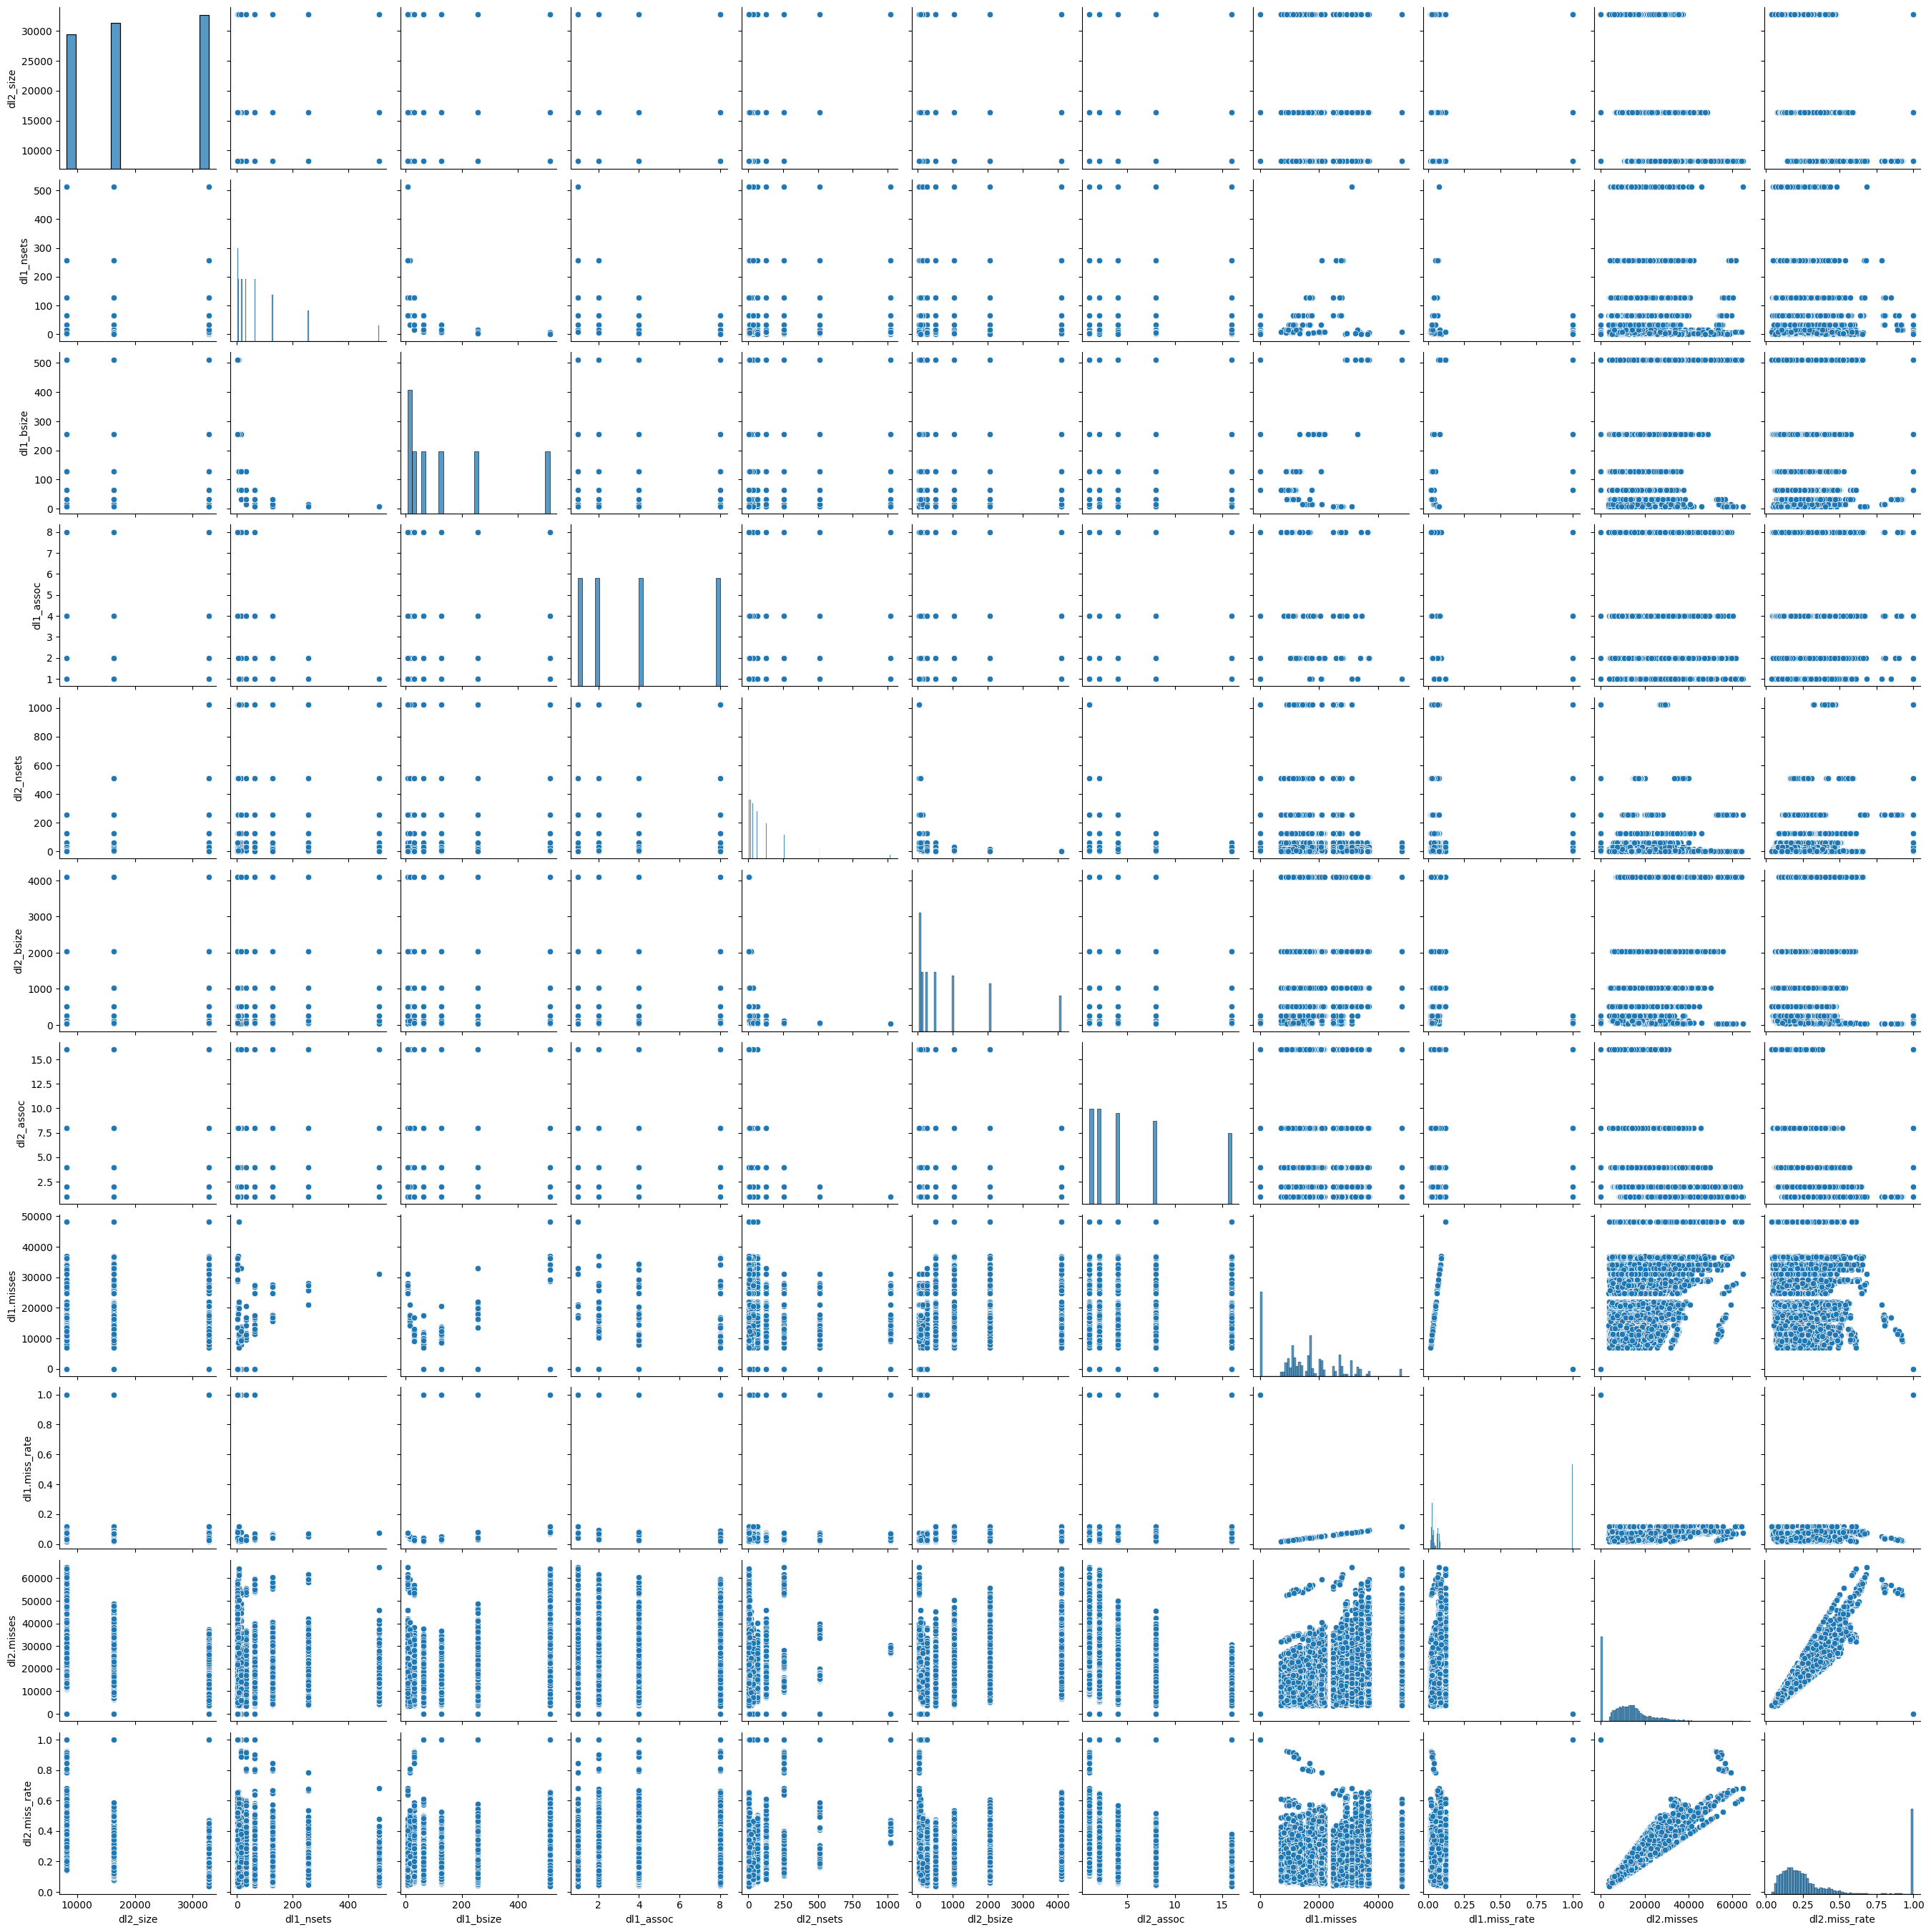

In [8]:
sns.pairplot(target_df1)

In [9]:
# il2_size 별로 데이터 분리
ratio2 = []
ratio4 = []
ratio8 = []
for i in range(len(target_df1)):
    division = target_df1.iloc[i,0]
    if division == 8192:
        ratio2.append(i)
    elif division == 16384:
        ratio4.append(i)
    else:
        ratio8.append(i)

ratio2_df = target_df1.iloc[ratio2]
ratio4_df = target_df1.iloc[ratio4]
ratio8_df = target_df1.iloc[ratio8]

In [10]:
#ratio2에서 가장 missrate가 낮은 구성을 il1기준, il2 기준으로 각각 가져옴
ratio2_df.sort_values('dl1.miss_rate').head(6)

,dl2_size,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,dl2_nsets,dl2_bsize,dl2_assoc,dl2_repl,dl1.misses,dl1.miss_rate,dl2.misses,dl2.miss_rate
9074,8192,8,64,8,l,2,4096,1,f,7049,0.0174,21181,0.4042
1620,8192,8,64,8,l,2,2048,2,r,7049,0.0174,18537,0.3538
12531,8192,8,64,8,l,16,256,2,f,7049,0.0174,13269,0.2532
14945,8192,8,64,8,l,4,2048,1,f,7049,0.0174,19651,0.3750
9588,8192,8,64,8,l,64,128,1,f,7049,0.0174,25704,0.4905
23629,8192,8,64,8,l,2,1024,4,f,7049,0.0174,11876,0.2266


In [11]:
ratio2_df.sort_values('dl2.miss_rate').head(6)

,dl2_size,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,dl2_nsets,dl2_bsize,dl2_assoc,dl2_repl,dl1.misses,dl1.miss_rate,dl2.misses,dl2.miss_rate
19279,8192,64,8,8,l,1,512,16,l,24720,0.0612,12013,0.1393
9707,8192,64,8,8,l,2,512,8,l,24720,0.0612,12105,0.1403
18245,8192,512,8,1,f,2,256,16,l,31004,0.0767,13403,0.1406
10748,8192,512,8,1,r,2,256,16,l,31004,0.0767,13403,0.1406
13643,8192,512,8,1,l,2,256,16,l,31004,0.0767,13403,0.1406
1755,8192,128,8,4,l,1,512,16,l,24868,0.0615,12288,0.1421


In [12]:
# 위에서 진행한 결과는 각각의 구성이 매우 달라 종합적인 판단을 위해 AMAT 계산 
# (l1 hit time = 1, l1 miss penalty = 10, l2 miss penalty 100)로 가정한다.
amat = 1 + ratio2_df.iloc[:,-3]*10 + ratio2_df.iloc[:,-3]*ratio2_df.iloc[:,-1]*100
amat_df = pd.DataFrame(columns = ['amat'], data = amat)
ratio2_amat_df = pd.concat([ratio2_df, amat_df],axis = 1)

In [31]:
ratio2_amat_df.sort_values('amat').head(10)

,dl2_size,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,dl2_nsets,dl2_bsize,dl2_assoc,dl2_repl,dl1.misses,dl1.miss_rate,dl2.misses,dl2.miss_rate,amat
4554,8192,8,64,8,l,1,512,16,l,7049,0.0174,11120,0.2122,1.543228
16407,8192,8,64,8,l,2,512,8,l,7049,0.0174,11260,0.2149,1.547926
7137,8192,8,64,8,l,1,1024,8,l,7049,0.0174,11320,0.2160,1.549840
12628,8192,8,64,8,l,1,512,16,r,7049,0.0174,11465,0.2188,1.554712
19900,8192,8,64,8,l,1,512,16,f,7049,0.0174,11464,0.2188,1.554712
14535,8192,8,64,8,l,2,1024,4,l,7049,0.0174,11492,0.2193,1.555582
3639,8192,8,64,8,l,4,128,16,l,7049,0.0174,11542,0.2203,1.557322
6696,8192,8,64,8,l,2,512,8,r,7049,0.0174,11573,0.2209,1.558366
26493,8192,8,64,8,l,4,512,4,l,7049,0.0174,11583,0.2211,1.558714
25427,8192,8,64,8,l,2,256,16,l,7049,0.0174,11584,0.2211,1.558714


In [14]:
#회귀분석을 통해 각 항목이 어느정도의 영향력이 있는지 확인함
x_data = ratio2_amat_df.iloc[:,[1,2,3,5,6,7]].values
ydata = ratio2_amat_df.iloc[:,-1].values
xdata = sm.add_constant(x_data, has_constant = 'add')

multi_model = sm.OLS(ydata, xdata)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     1116.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:15:03   Log-Likelihood:                -42104.
No. Observations:                8568   AIC:                         8.422e+04
Df Residuals:                    8561   BIC:                         8.427e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2566      1.215      1.035      0.301      -1.124       3.637
x1            -0.0297      0.004     -7.504      0.000      -0.038      -0.022
x2             0.1271      0.002     53.774      0.000       0.123       0.132
x3            -0.5334      0.146     -3.652      0.000      -0.820      -0.247
x4             0.2775      0.008     33.755      0.000       0.261       0.294
x5            -0.0066      0.000    -16.373      0.000      -0.007      -0.006
x6             1.2316      0.082     14.969      0.000       1.070       1.393
==============================================================================
Omnibus:                      447.106   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.728
Skew:                           0.588   Prob(JB):                    2.29e-113
Kurtosis:                       3.264   Cond. No.                     4.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

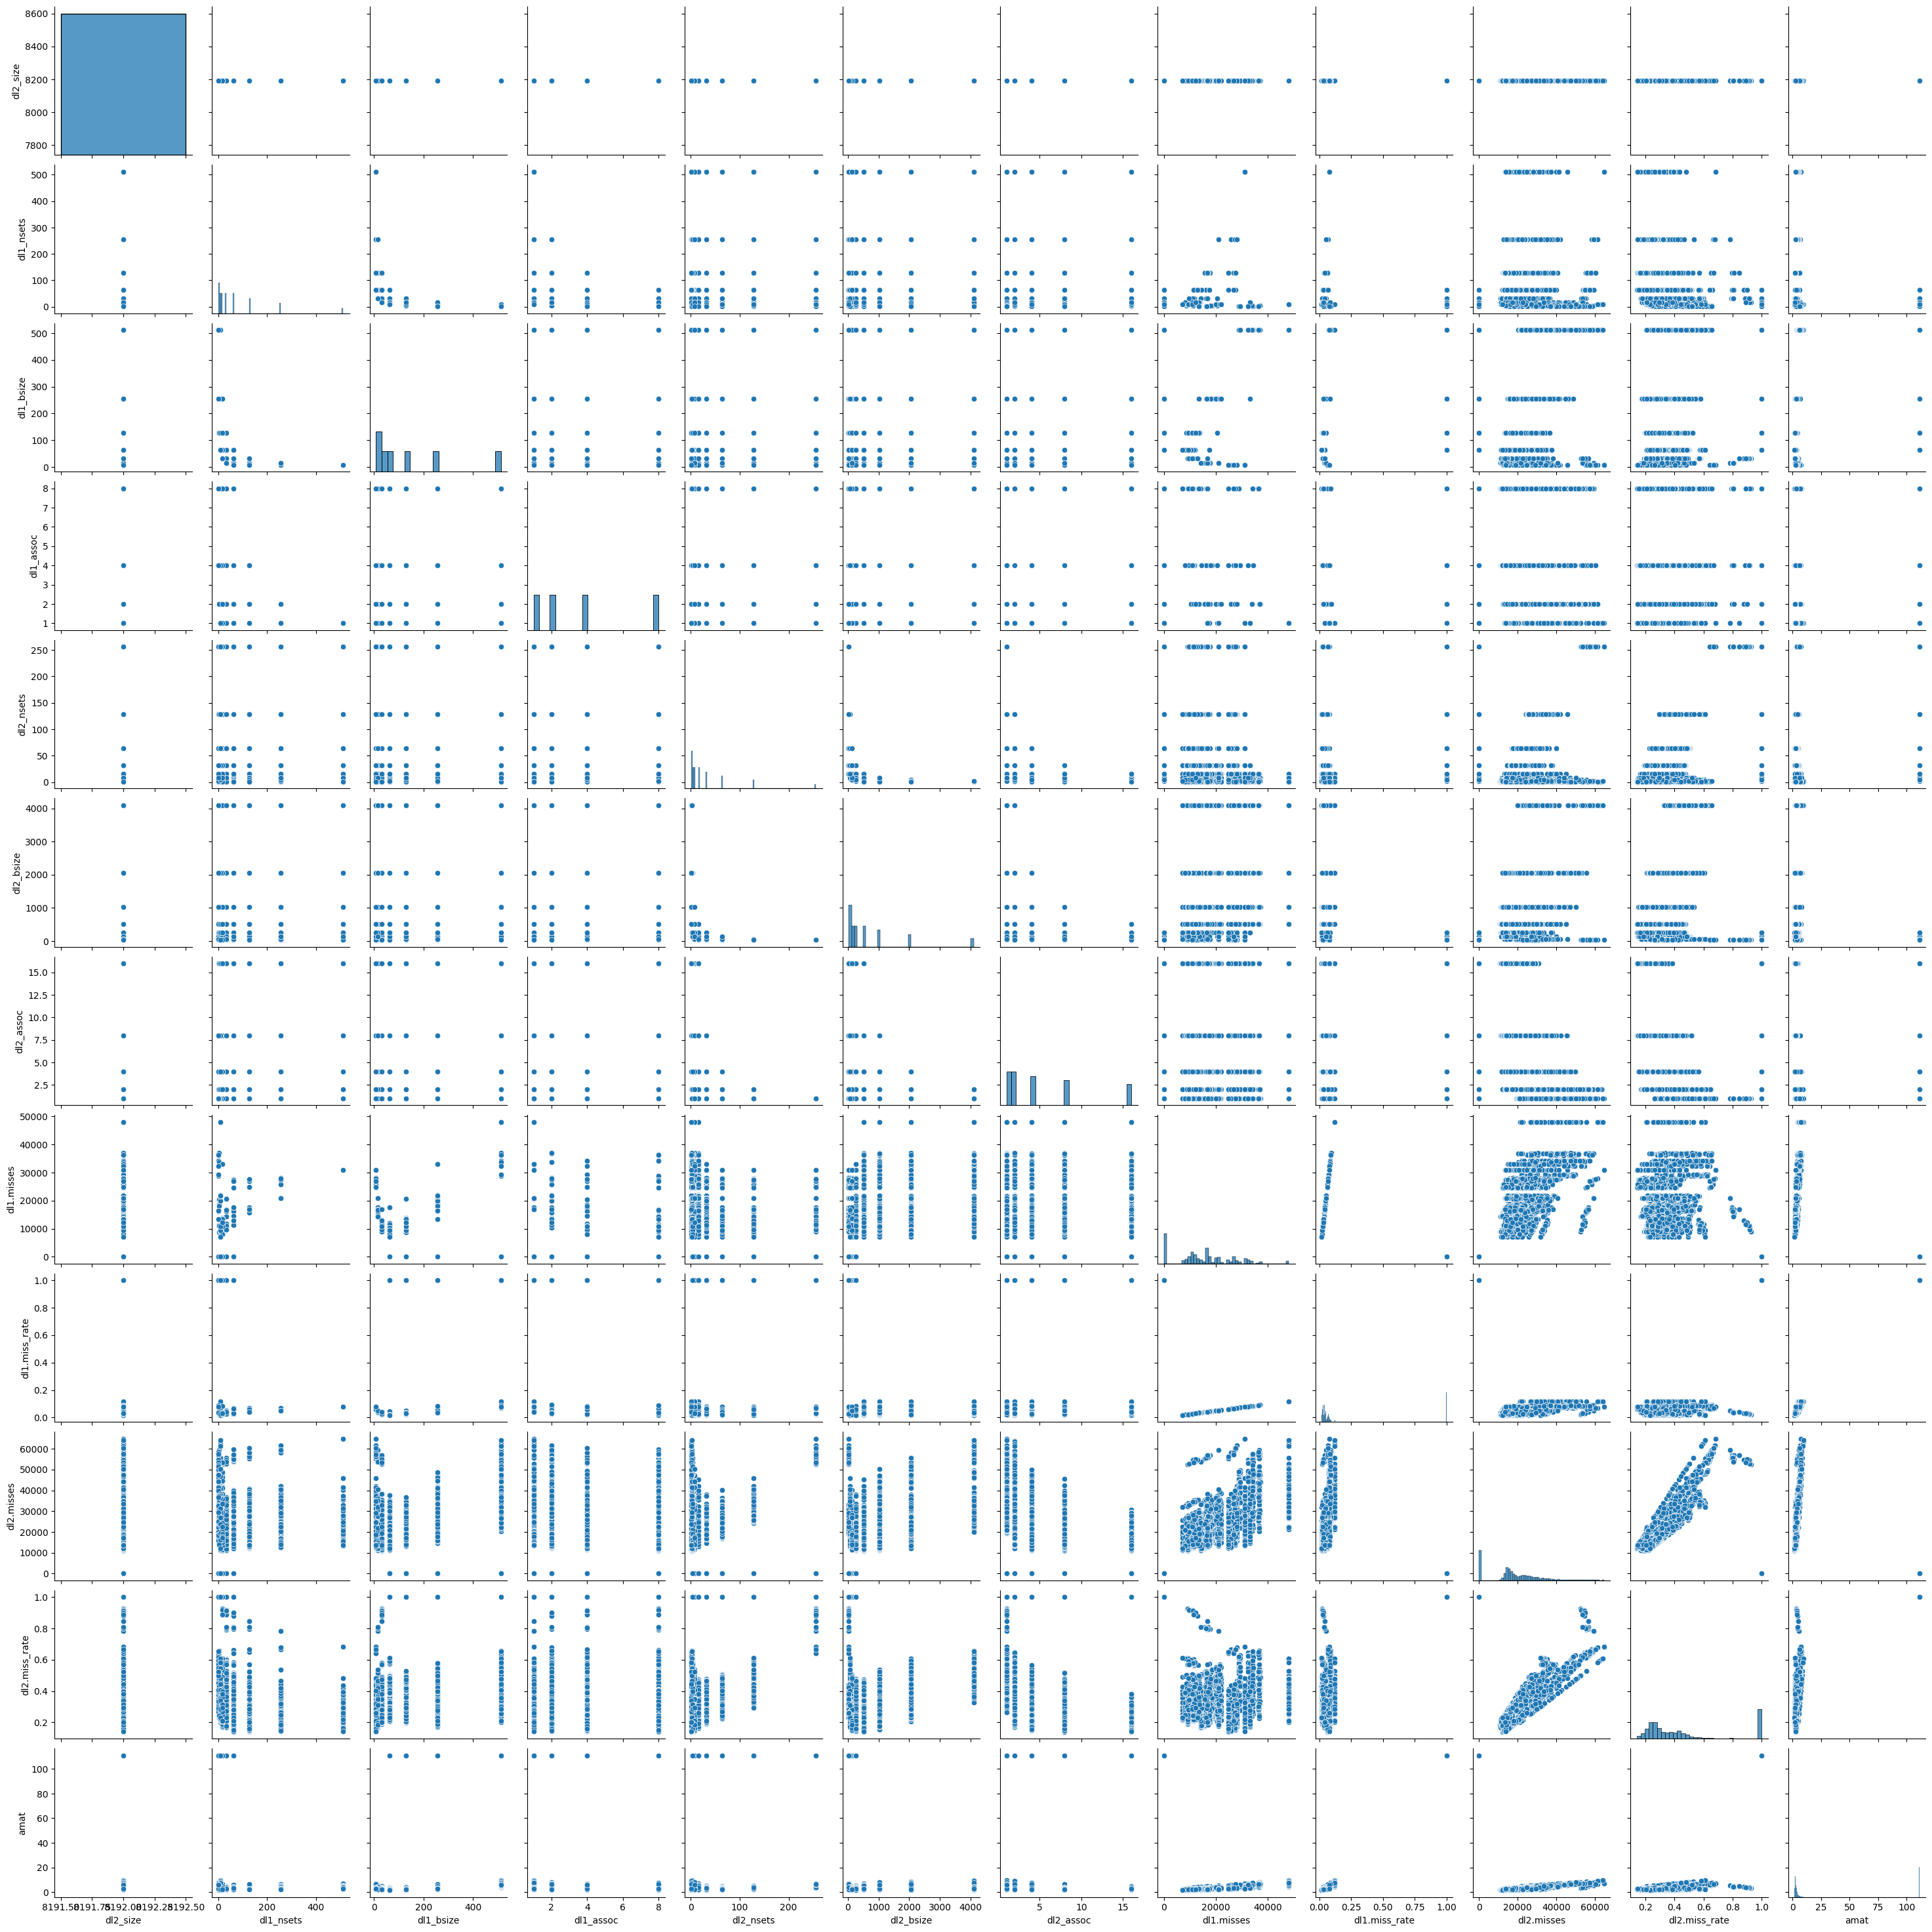

In [15]:
sns.pairplot(ratio2_amat_df)

In [32]:
# ratio4의 경우도 계산함
amat = 1 + ratio4_df.iloc[:,-3]*10 + ratio4_df.iloc[:,-3]*ratio4_df.iloc[:,-1]*100
amat_df = pd.DataFrame(columns = ['amat'], data = amat)
ratio4_amat_df = pd.concat([ratio4_df, amat_df],axis = 1)
ratio4_amat_df.sort_values('amat').head(10)

,dl2_size,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,dl2_nsets,dl2_bsize,dl2_assoc,dl2_repl,dl1.misses,dl1.miss_rate,dl2.misses,dl2.miss_rate,amat
25702,16384,8,64,8,l,4,256,16,l,7049,0.0174,6667,0.1272,1.395328
27049,16384,8,64,8,l,8,128,16,l,7049,0.0174,7046,0.1345,1.408030
3027,16384,8,64,8,l,4,256,16,f,7049,0.0174,7109,0.1357,1.410118
22192,16384,8,64,8,l,2,512,16,l,7049,0.0174,7348,0.1402,1.417948
12040,16384,8,64,8,l,16,128,8,l,7049,0.0174,7464,0.1424,1.421776
22690,16384,8,64,8,l,8,128,16,f,7049,0.0174,7563,0.1443,1.425082
1629,16384,8,64,8,l,8,256,8,l,7049,0.0174,7574,0.1445,1.425430
10639,16384,8,64,8,l,4,256,16,r,7049,0.0174,7593,0.1449,1.426126
3980,16384,8,64,8,l,2,512,16,r,7049,0.0174,7619,0.1454,1.426996
25316,16384,8,64,8,l,2,512,16,f,7049,0.0174,7874,0.1503,1.435522


In [17]:
#회귀분석을 통해 각 항목이 어느정도의 영향력이 있는지 확인함
x_data = ratio4_amat_df.iloc[:,[1,2,3,5,6,7]].values
ydata = ratio4_amat_df.iloc[:,-1].values
xdata = sm.add_constant(x_data, has_constant = 'add')

multi_model = sm.OLS(ydata, xdata)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1108.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:15:26   Log-Likelihood:                -45750.
No. Observations:                9324   AIC:                         9.151e+04
Df Residuals:                    9317   BIC:                         9.156e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3719      1.153      2.924      0.003       1.111       5.632
x1            -0.0281      0.004     -7.454      0.000      -0.036      -0.021
x2             0.1168      0.002     51.931      0.000       0.112       0.121
x3            -0.4896      0.139     -3.523      0.000      -0.762      -0.217
x4             0.1368      0.004     33.957      0.000       0.129       0.145
x5            -0.0068      0.000    -20.059      0.000      -0.007      -0.006
x6             0.9172      0.075     12.263      0.000       0.771       1.064
==============================================================================
Omnibus:                      605.046   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.351
Skew:                           0.661   Prob(JB):                    6.93e-159
Kurtosis:                       3.355   Cond. No.                     4.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

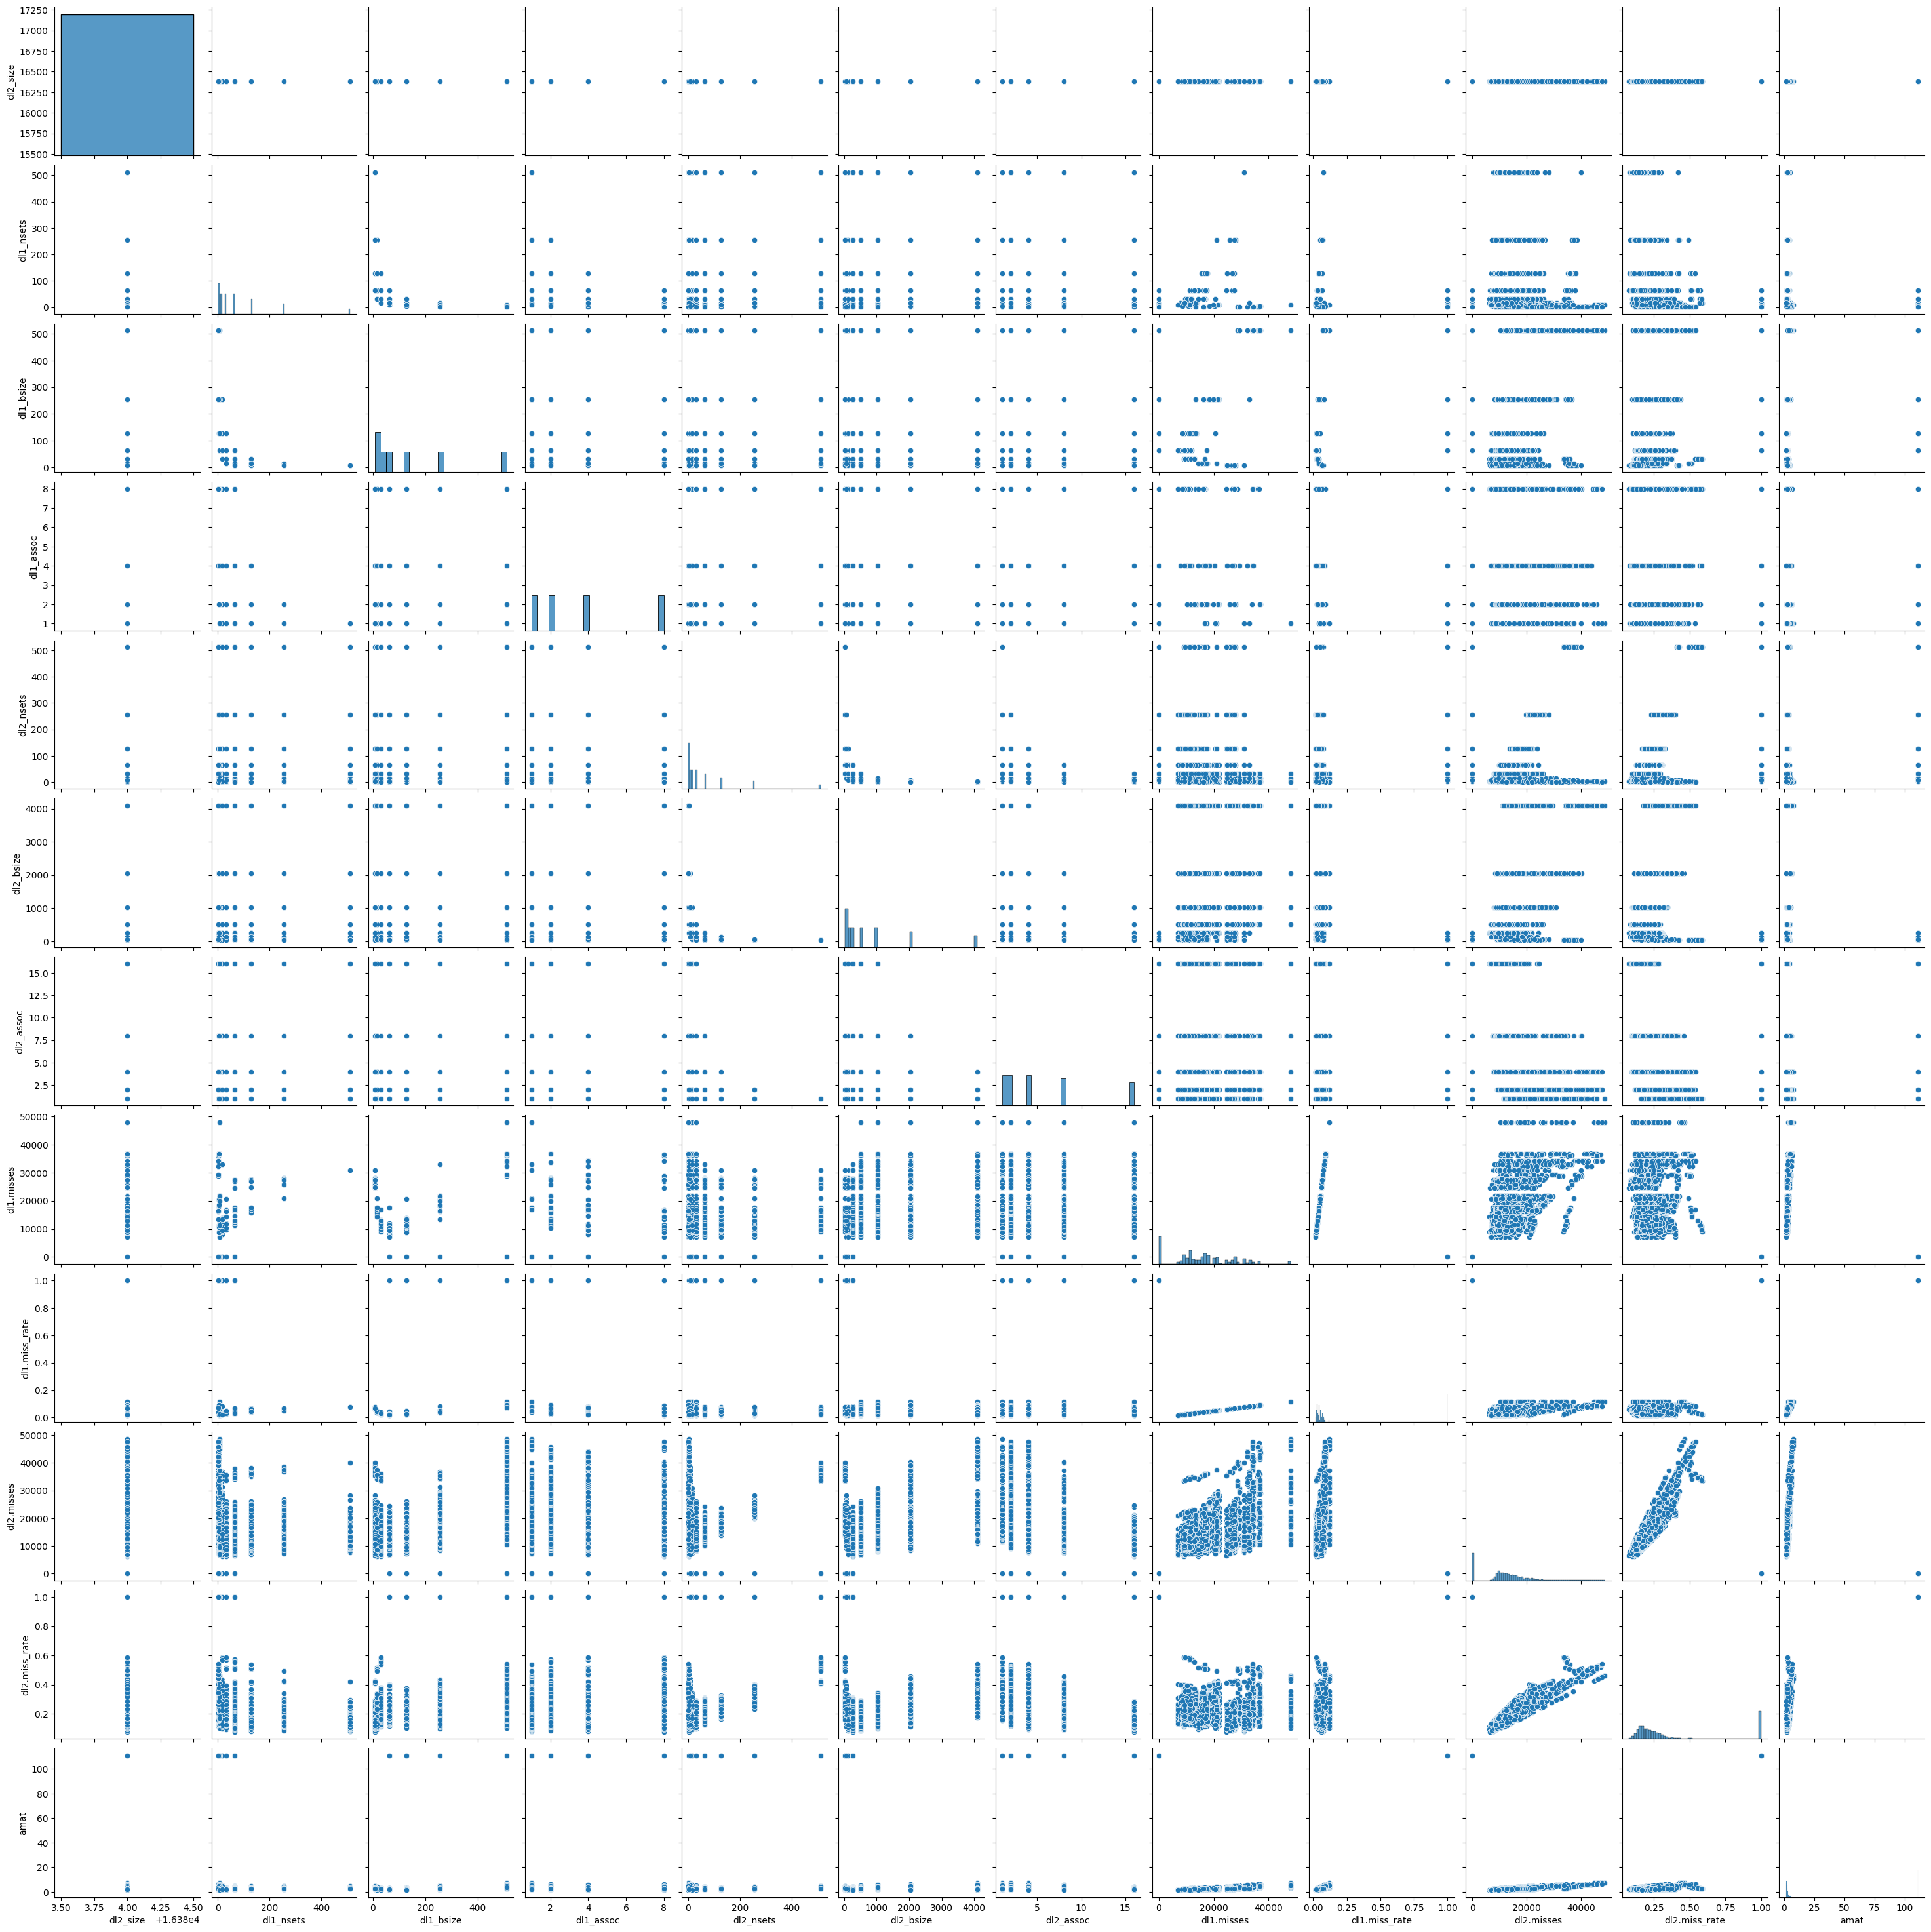

In [22]:
sns.pairplot(ratio4_amat_df)

In [33]:
# ratio8의 경우도 계산함
amat = 1 + ratio8_df.iloc[:,-3]*10 + ratio8_df.iloc[:,-3]*ratio8_df.iloc[:,-1]*100
amat_df = pd.DataFrame(columns = ['amat'], data = amat)
ratio8_amat_df = pd.concat([ratio8_df, amat_df],axis = 1)
ratio8_amat_df.sort_values('amat').head(10)

,dl2_size,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,dl2_nsets,dl2_bsize,dl2_assoc,dl2_repl,dl1.misses,dl1.miss_rate,dl2.misses,dl2.miss_rate,amat
9838,32768,8,64,8,l,4,512,16,l,7049,0.0174,3714,0.0709,1.297366
473,32768,8,64,8,l,8,256,16,l,7049,0.0174,3777,0.0721,1.299454
5643,32768,8,64,8,l,8,512,8,l,7049,0.0174,3906,0.0745,1.303630
27558,32768,8,64,8,l,16,256,8,l,7049,0.0174,3909,0.0746,1.303804
21028,32768,8,64,8,l,4,512,16,f,7049,0.0174,4242,0.0810,1.314940
23002,32768,8,64,8,l,8,256,16,f,7049,0.0174,4269,0.0815,1.315810
6974,32768,8,64,8,l,8,512,8,f,7049,0.0174,4394,0.0839,1.319986
24198,32768,8,64,8,l,16,256,8,f,7049,0.0174,4414,0.0842,1.320508
19662,32768,8,64,8,l,8,512,8,r,7049,0.0174,4635,0.0885,1.327990
21197,32768,8,64,8,l,16,128,16,l,7049,0.0174,4652,0.0888,1.328512


In [20]:
#회귀분석을 통해 각 항목이 어느정도의 영향력이 있는지 확인함
x_data = ratio8_amat_df.iloc[:,[1,2,3,5,6,7]].values
ydata = ratio8_amat_df.iloc[:,-1].values
xdata = sm.add_constant(x_data, has_constant = 'add')

multi_model = sm.OLS(ydata, xdata)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:15:34   Log-Likelihood:                -48147.
No. Observations:                9828   AIC:                         9.631e+04
Df Residuals:                    9821   BIC:                         9.636e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5330      1.098      4.130      0.000       2.381       6.685
x1            -0.0272      0.004     -7.471      0.000      -0.034      -0.020
x2             0.1104      0.002     50.797      0.000       0.106       0.115
x3            -0.4605      0.134     -3.429      0.001      -0.724      -0.197
x4             0.0679      0.002     34.525      0.000       0.064       0.072
x5            -0.0069      0.000    -23.678      0.000      -0.007      -0.006
x6             0.7883      0.068     11.579      0.000       0.655       0.922
==============================================================================
Omnibus:                      717.038   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.515
Skew:                           0.705   Prob(JB):                    1.40e-192
Kurtosis:                       3.410   Cond. No.                     5.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

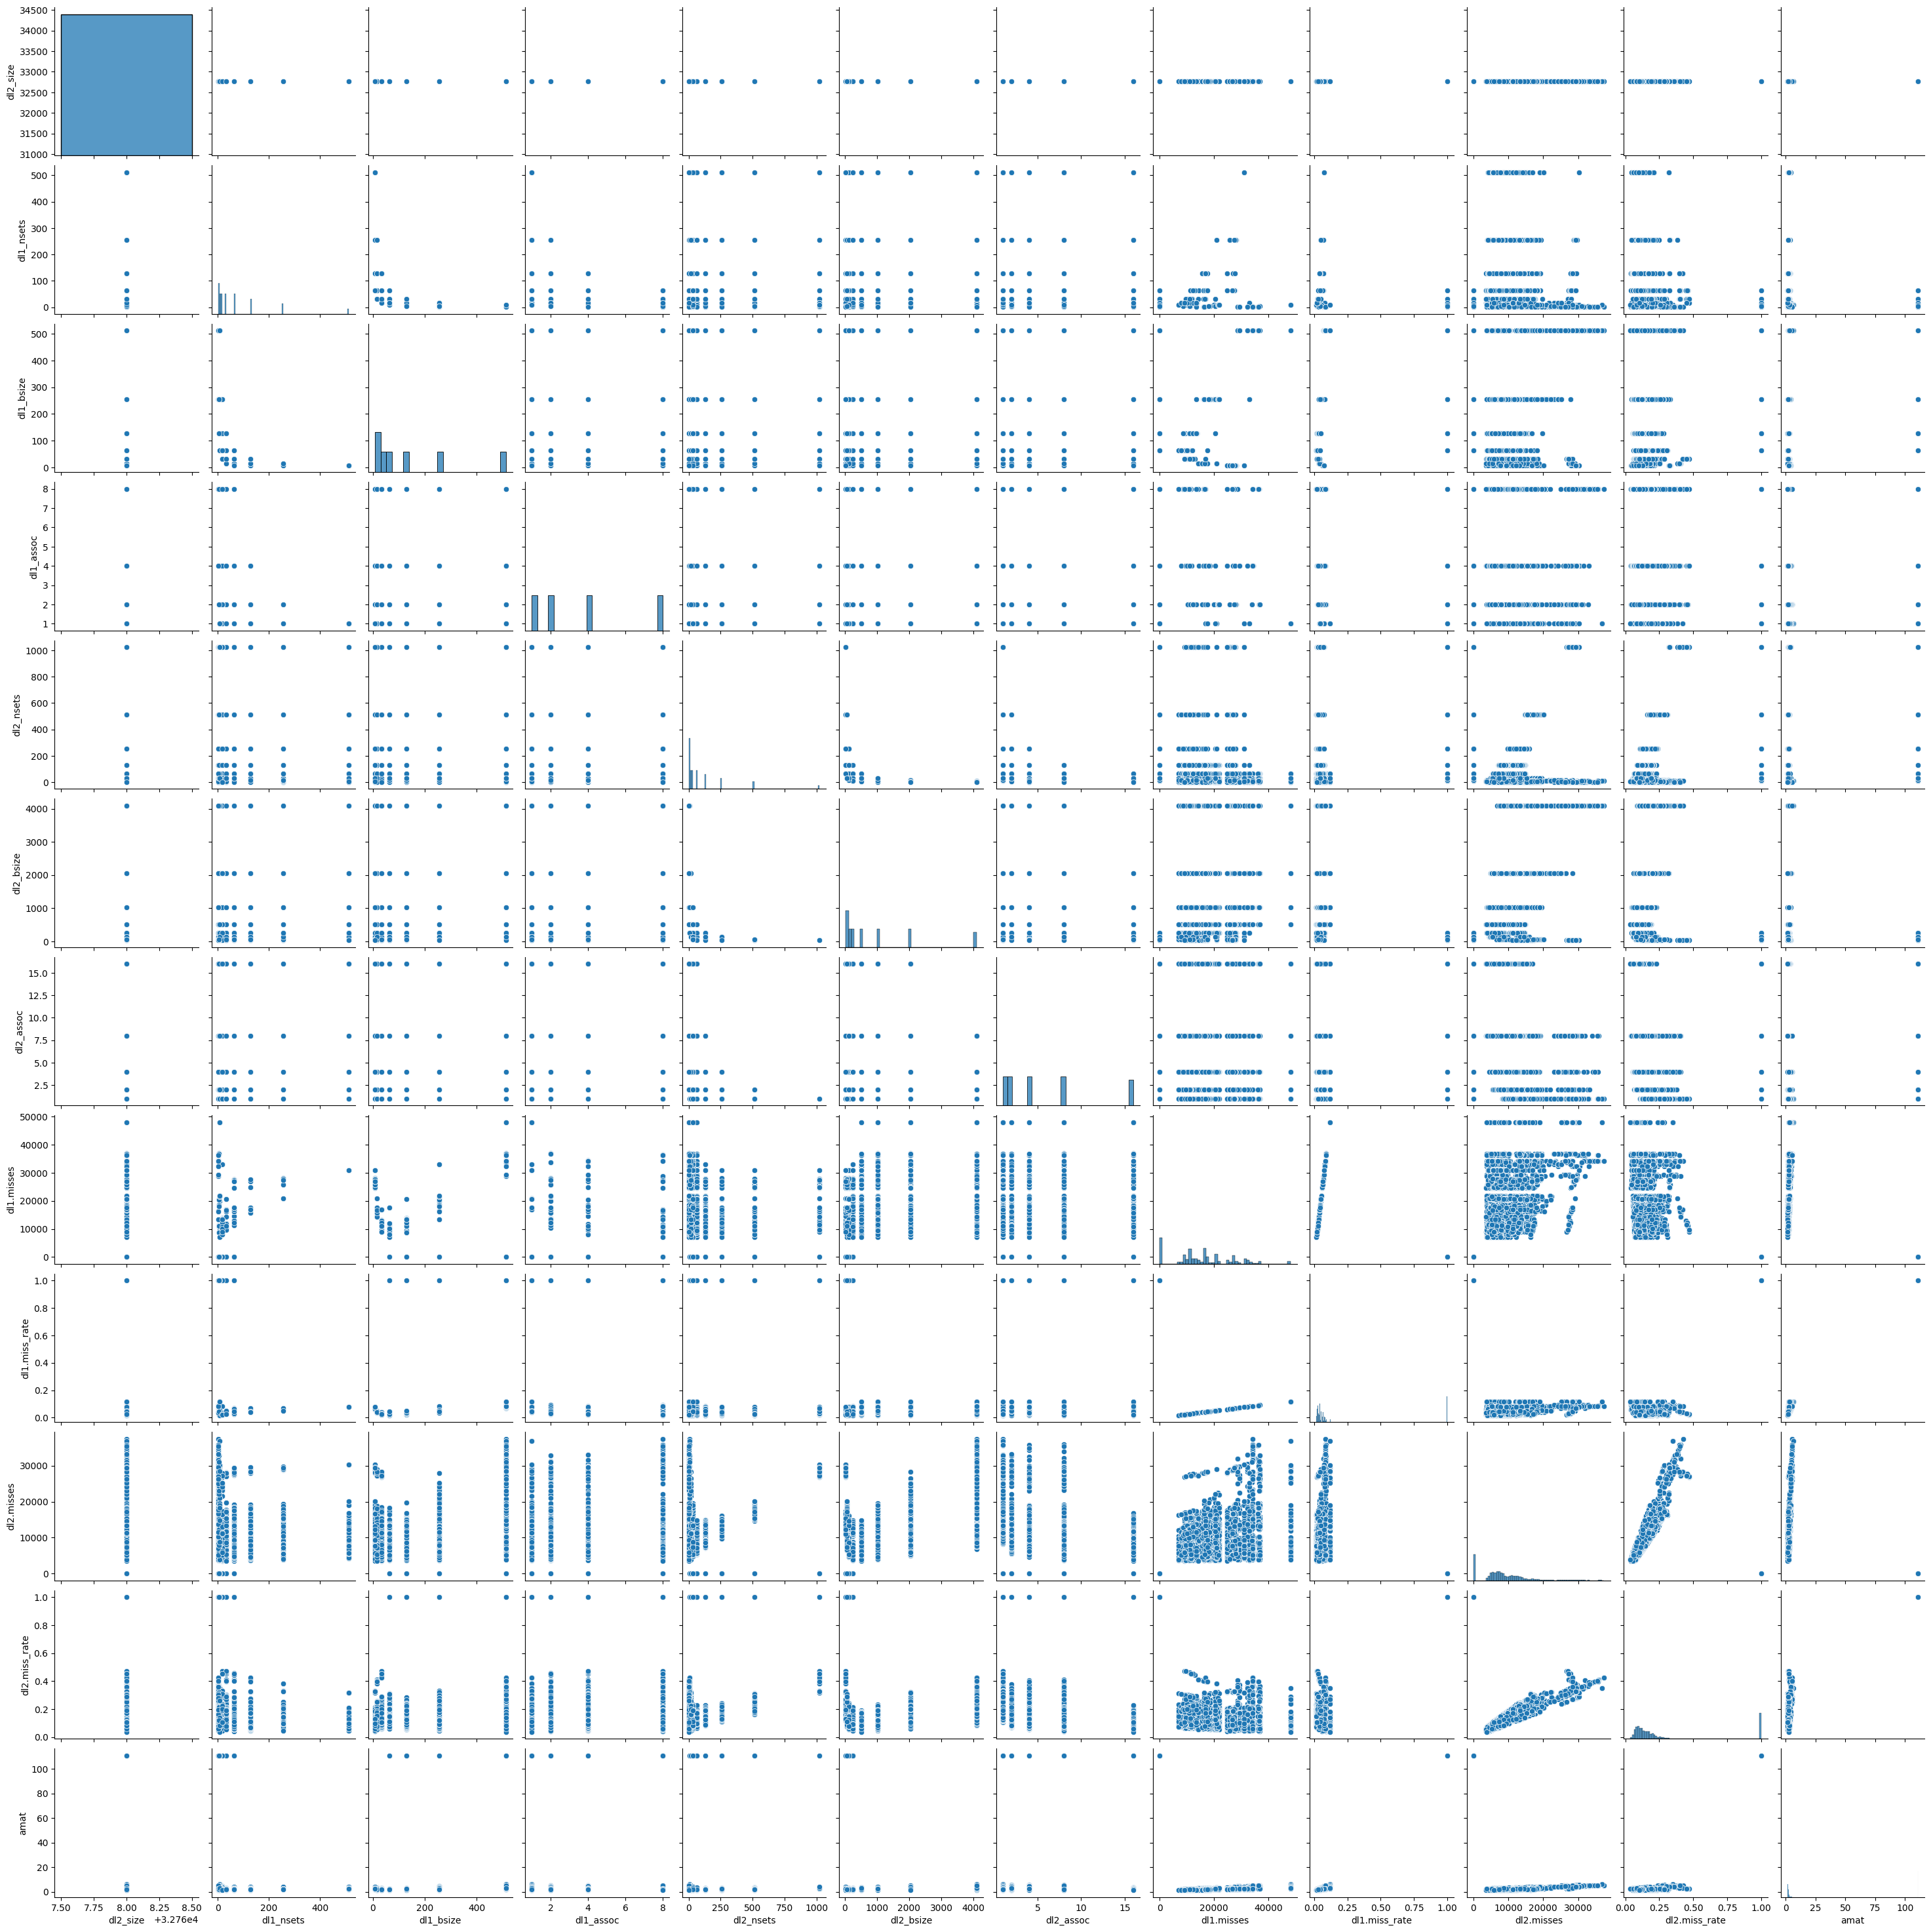

In [23]:
sns.pairplot(ratio8_amat_df)